In [1]:
# import sys
# import pathlib
# sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))

# import os
# import h5py
# import numpy as np
# import matplotlib.pyplot as plt
# import networkx as nx
# import SALib as salib
# from SALib.sample import sobol as salib_sample_sobol
# from SALib.analyze import delta, dgsm, fast, ff, hdmr, morris, pawn, rbd_fast, sobol

# import dimod
# import dwave
# import dwave.system
# from dwave.system import DWaveSampler, EmbeddingComposite, FixedEmbeddingComposite
# import dwave.inspector
# import dwave_networkx as dnx
# import minorminer
# #import embera

# from src.particle_funcs import distance_matrix as distance_matrix
# import src.leap_funcs.qubo.q_matrix as q_matrix

# from src import leap_funcs as leap_funcs
# from src.leap_funcs import embedding_quality

# from src import h5py_funcs
# from src.h5py_funcs import discoveries, init_custom_getstates, io, parameterstudy_using_info_file

In [2]:
# num_particles = 5

# part_coords_n = np.zeros((num_particles,2))
# part_coords_nm1 = np.zeros((num_particles,2))

# for i in range(np.shape(part_coords_n)[0]):
#     part_coords_n[i,:] = [0, i]
#     part_coords_nm1[i,:] = [1.0*1+0.075*i, i]

# fig_initial, axs_initial = plt.subplots(1,1)
# axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
# axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
# axs_initial.set_aspect('equal')
# fig_initial.legend()
# #fig_initial.show()

# correct_sol = np.zeros(num_particles*num_particles)
# for i in range(1, num_particles+1):
#     correct_sol[(i-1)*num_particles + i -1] = 1.

# print(correct_sol)

In [3]:
# distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1)
# Q_dist_diag = q_matrix.q_dist_diag(distances)
# Q_part = q_matrix.q_part(np.shape(distances)[0])
# Q_pos = q_matrix.q_pos(np.shape(distances)[0])
# Q_array = Q_dist_diag + Q_part + Q_pos
# Q_dict = q_matrix.Q_convert_to_dict(Q_array)
# #with np.printoptions(precision=3, linewidth=1000, threshold=1e6):
# #    print(Q_array)

In [4]:
# num_vars = 3
# problem_salib = {
#     'num_vars': num_vars,
#     'names': ['annealing_time', 'programming_thermalization', 'readout_thermalization'],
#     #'bounds': [[0.5, 2000.0], [0.0, 10000.0], [0.0, 10000.0]]
#     'bounds': [[0.5, 1000.0], [0.0, 1000.0], [0.0, 1000.0]]
# }
# p = 8
# N = np.power(2,p)
# calc_second_order = True
# num_samples = N*(2*num_vars+2) if calc_second_order else N*(num_vars+2)
# print(f'D = {num_vars}')
# print(f'N = 2^p = 2^{p} = {N}')
# print(f'calc_second_order = {calc_second_order}, --> number of samples = N({2 if calc_second_order else 1}D+2) = {num_samples}')
# # generate N(2D+2) samples, N is specified, calc_second_order=False would make 2D -> 1D, where D is number of variables
# # 2 ^ 1 = 2
# # 2 ^ 2 = 4
# # # 2 ^ 3 = 8
# # 2 ^ 4 = 16
# # 2 ^ 5 = 32
# # 2 ^ 6 = 64
# # 2 ^ 7 = 128
# # 2 ^ 8 = 256
# # 2 ^ 9 = 512
# # 2 ^ 10 = 1024

# samples_salib = salib.sample.sobol.sample(problem_salib, N=N, calc_second_order=calc_second_order)
# assert samples_salib.shape == (num_samples, num_vars), 'size of samples array is not correct'

# print(samples_salib.shape, type(samples_salib))
# #print(samples_salib)
# print((samples_salib[0]), samples_salib[0])
# print((samples_salib[0][0]), samples_salib[0][0])

# #for i in range(np.shape(samples_salib)[0]):
# #    print(samples_salib[i])

In [5]:
# #with open('../API_Token_Oliver_Dev.txt') as file:
# with open('../API_Token_MBD_qdem.txt') as file:
#     token = file.readline().rstrip()
#     architecture = file.readline().rstrip()
# #print(f'token: {token}')
# #print(f'architecture: {architecture}')

# solver ={'name': 'Advantage_system5.4'}
# embedding_file_path = 'test_analyze_embedding'
# embedding_file_name = 'analyzes_parts_{}_{}.h5'.format(5, '09')
# embedding_file_name_path = os.path.join(embedding_file_path, embedding_file_name)
# embedding_name = 'embedding'+'_em_wo_migration_layout'
# read_embedding = h5py_funcs.io.read_embedding_from_hdf5_file(file_name_path=embedding_file_name_path, data_name=embedding_name)

# sampler = DWaveSampler(token = token, )
# tmp_not_needed_as_a_variable = sampler.adjacency # required for sampler having all data needed for __getstate__, no idea why this is necessary
# composite = FixedEmbeddingComposite(sampler, read_embedding)

# access_time = 0.0

# num_qubits = len(set(inner for outer in read_embedding.values() for inner in outer))
# for param_set in samples_salib:
#     _tmp = composite.child.solver.estimate_qpu_access_time(num_qubits=num_qubits, num_reads=1000, annealing_time=param_set[0], programming_thermalization=param_set[1], readout_thermalization=param_set[2])
#     access_time += _tmp
#     #print(_tmp)
# print(f'access_time in microseconds : {access_time}')
# print(f'access_time in seconds: {access_time/1e6}')
# print('30 mins in seconds:', 30*60)
# print(len(samples_salib))

In [6]:
# import threading
# import queue
# import time

# import numpy as np

In [7]:
# # Specify number of threads to use for submitting problems to the solver, and for writing the answers to file. Also provide empty lists to -later- store the threads in.
# num_threads_submitters = 5
# num_threads_writers = 1 # Must always be 1, because writing to h5py file is not thread safe. Maybe that changes in the future.
# list_threads_submitters = []
# list_threads_writers = []

# # Create the queues for the problems to submit and the answers to write.
# queue_problems_to_submit = queue.Queue()
# queue_answers_to_write = queue.Queue()

# # Create the threading.Event() and threading.Barrier() objects to control the threads.
# #     events are just boolean flags that are used to determine how long the threads should keep trying to retrieve work packages from the queues, used for both -submitters- and -writers-.
# #     barriers are used to make sure that all threads of interest come together at a certain position of the code at the same time, used for -submitters- only, because number of writers is required to be 1 anyways.
# # threading.Event() is boolean, initially False, .set() to True, .clear() to False.
# event_flag_submitters_should_work = threading.Event()
# event_flag_writers_should_work = threading.Event()
# barrier_submitters = threading.Barrier(parties=num_threads_submitters, action=event_flag_submitters_should_work.clear, timeout=None)
# barrier_writers = threading.Barrier(parties=num_threads_writers, action=event_flag_writers_should_work.clear, timeout=None)
# lock_multiple_writers = threading.Lock()



# def submitter_work(problem):
#     print(f'    problem {problem} is being worked on by {threading.current_thread().name}')
#     return f'solution to problem {problem}'


# rng = np.random.default_rng()
# def submitter_work(problem):
#     print(f'    problem {problem} is being worked on by {threading.current_thread().name}')
    
#     a = rng.random((1000,1000))
#     b = rng.random((1000,1000))
#     c = np.dot(a,b).sum()

#     del a
#     del b

#     return f'solution to problem {problem} = {c}'


# def writer_work(answer):
#     print(f'    answer {answer} is being worked on by {threading.current_thread().name}')
#     return

# def submitter():
#     mydata = threading.local()
#     while event_flag_submitters_should_work.is_set():
#         if not queue_problems_to_submit.empty():
#             try:
#                 problem = queue_problems_to_submit.get()
#                 print(f'submitter {threading.current_thread().name} got problem: {problem}')
#                 time.sleep(1)
#                 mydata.x = submitter_work(problem)
#                 queue_answers_to_write.put(mydata.x)
#                 queue_problems_to_submit.task_done()
#             except Exception as e:
#                 print('submitter exception, queue was not empty but problem could not get retrieved. Will wait for at least 0.1 seconds and try again.')
#                 print('----', repr(e))
#                 time.sleep(0.1)
#         elif queue_problems_to_submit.empty():
#             print('submitter queue is empty, will wait at barrier for all submitters to finish.')
#             barrier_submitters.wait()
#             return
#         else:
#             print('queue_problems_to_submit is neither -empty- nor -not empty-, this should not happen. Will wait for at least 0.1 seconds before checking again.')
#             time.sleep(0.1)


# def writer():
#     if num_threads_writers != 1:
#         event_flag_submitters_should_work.clear()
#         print(f'AssertionError: num_threads_writers must always be 1 (currently {num_threads_writers}), because writing to h5py file is not thread safe. \n \
#               One of the writer threads will try to finish the queue_answers_to_write, but for the sake of your own sanity, fix the number of writer threads to 1.')
        
#         lock_multiple_writers.acquire()

#         if lock_multiple_writers.locked():
#             pass
#         else:
#             barrier_writers.wait()
#             return
#     mydata = threading.local()
#     while event_flag_writers_should_work.is_set():
#         if not queue_answers_to_write.empty():
#             try:
#                 mydata.x = queue_answers_to_write.get()
#                 print(f'writer {threading.current_thread().name} got answer: {mydata.x}')
#                 time.sleep(1)
#                 writer_work(mydata.x)
#                 queue_answers_to_write.task_done()
#             except Exception as e:
#                 print('writer exception, queue was not empty but answer could not get retrieved. Will wait for at least 0.1 seconds and try again.')
#                 print('----', repr(e))
#                 time.sleep(0.1)
#         elif queue_answers_to_write.empty() and event_flag_submitters_should_work.is_set():
#             print('writer queue is empty, will wait for at least 0.1 seconds before checking again.')
#             time.sleep(0.1)
#         elif queue_answers_to_write.empty() and not event_flag_submitters_should_work.is_set():
#             print('writer queue is empty and event_flag_submitters_should_work is not set (all submitters should have finished by now), so writer will also finish.')
#             if lock_multiple_writers.locked():
#                 lock_multiple_writers.release()
#             barrier_writers.wait()
#             return
#         else:
#             print('queue_answers_to_write is neither empty nor not empty, this should not happen. Will wait for at least 0.1 seconds before checking again.')
#             time.sleep(0.1)
    
#     return
            

# for i in range(500):
#     queue_problems_to_submit.put(i)

# event_flag_submitters_should_work.set()
# event_flag_writers_should_work.set()

# for i in range(num_threads_submitters):
#     list_threads_submitters.append(threading.Thread(group=None, target=submitter, name='Thread_submittter_{:03}'.format(i), args=(), kwargs={}, daemon=None))
# for i in range(num_threads_writers):
#     list_threads_writers.append(threading.Thread(group=None, target=writer, name='Thread_writer_{:03}'.format(i), args=(), kwargs={}, daemon=None))

# for t in list_threads_submitters:
#     print(f'starting thread {t.name}')
#     t.start()
# for t in list_threads_writers:
#     print(f'starting thread {t.name}')
#     t.start()

# for t in list_threads_submitters:
#     t.join()
# print('Joined all submitter threads.')
# for t in list_threads_writers:
#     t.join()
# event_flag_writers_should_work.clear()
# print('Joined all writer threads.')

# print('Is queue_problems_to_submit empty:', queue_problems_to_submit.empty())
# print('Is queue_answers_to_write empty:', queue_answers_to_write.empty())



In [8]:
# import threading
# import queue
# import time
# import dwave
# import dwave.system

# class Multithread_Variationstudy:
#     '''Simple class that handles the multithreading of, e.g., the parameterstudy using the DWaveSampler. 
#     First it collects all the necessary data and information needed. Then starts multiple threads to do the work, and a single thread to write the results to a file.
#     For the interaction with DWave annealers this is beneficial, because the overhead of communication to the Annealer is significant. 
#     The number of threads for writing the answers to file is always 1, because writing to h5py file is not thread safe (currently at least).
#     To specify what each of the threads (workers and writers) do, overload the methods -submitter_work- and -writer_work-, using the following signatures:
#         submitter_work(single instance of study, verbose=int) -> single solution to write to file
#         writer_work: (single solution to write to file, verbose=int) -> None
#     '''

#     def __init__(self, num_threads_submitters=5, num_threads_writers=1, method='DWave-Annealer'):
        
#         self.problems = None

#         self.num_threads_submitters = num_threads_submitters
#         self.num_threads_writers = num_threads_writers

#         self._list_threads_submitters = []
#         self._list_threads_writers = []
#         self._list_threads_reporters = []

#         self.solver = {
#         #    'token' : None,
#         #    'client' : None,    # e.g. 'qpu'
#         #    'architecture' : None,    # e.g. 'pegasus'
#         #    'region' : None,    # e.g. 'eu-central-1'
#         #    'name' : None     # e.g. 'Advantage_system5.4'
#         }

#         self.info_folder_path = None
#         self.data_folder_path = None
#         self.info_file_name = None
#         self.data_file_name = None

#         # Create the queues for the problems to submit and the answers to write.
#         self._queue_problems_to_submit = queue.Queue()
#         self._queue_answers_to_write = queue.Queue()

#         # Create the threading.Event() and threading.Barrier() objects to control the threads.
#         #     events are just boolean flags that are used to determine how long the threads should keep trying to retrieve work packages from the queues, used for both -submitters- and -writers-.
#         #     barriers are used to make sure that all threads of interest come together at a certain position of the code at the same time, used for -submitters- only, because number of writers is required to be 1 anyways.
#         # threading.Event() is boolean, initially False, .set() to True, .clear() to False.
#         self._event_flag_submitters_should_work = threading.Event()
#         self._event_flag_writers_should_work = threading.Event()
#         self._barrier_submitters = threading.Barrier(parties=self.num_threads_submitters, action=self._event_flag_submitters_should_work.clear, timeout=None)
#         self._barrier_writers = threading.Barrier(parties=self.num_threads_writers, action=self._event_flag_writers_should_work.clear, timeout=None)
#         self._lock_multiple_writers = threading.Lock()

        
#     def _submitter(self, verbose=0):
#         mydata_local = threading.local()
#         while self._event_flag_submitters_should_work.is_set():
#             if not self._queue_problems_to_submit.empty():
#                 try:
#                     mydata_local.problem = self._queue_problems_to_submit.get()
#                     if verbose > 0: print(f'submitter {threading.current_thread().name} got problem: {mydata_local.problem}')
#                     time.sleep(1)
#                     mydata_local.answer = self.submitter_work(mydata_local.problem, verbose=verbose)
#                     self._queue_answers_to_write.put(mydata_local.answer)
#                     self._queue_problems_to_submit.task_done()
#                 except Exception as e:
#                     print('submitter exception, queue was not empty but problem could not get retrieved. Will wait for at least 0.1 seconds and try again.')
#                     print('----', repr(e))
#                     time.sleep(0.1)
#             elif self._queue_problems_to_submit.empty():
#                 print('submitter queue is empty, will wait at barrier for all submitters to finish.')
#                 self._barrier_submitters.wait()
#                 del mydata_local
#                 return
#             else:
#                 print('queue_problems_to_submit is neither -empty- nor -not empty-, this should not happen. Will wait for at least 0.1 seconds before checking again.')
#                 time.sleep(0.1)


#     def _writer(self, verbose=0):
#         if self.num_threads_writers != 1:
#             self._event_flag_submitters_should_work.clear()
#             print(f'AssertionError: num_threads_writers must always be 1 (currently {self.num_threads_writers}), because writing to h5py file is not thread safe. \n \
#                   One of the writer threads will try to finish the queue_answers_to_write, but for the sake of your own sanity, fix the number of writer threads to 1.')

#             self._lock_multiple_writers.acquire()

#             if self._lock_multiple_writers.locked():
#                 pass
#             else:
#                 self._barrier_writers.wait()
#                 return
#         mydata_local = threading.local()
#         while self._event_flag_writers_should_work.is_set():
#             if not self._queue_answers_to_write.empty():
#                 try:
#                     mydata_local.answer = self._queue_answers_to_write.get()
#                     if verbose > 0: print(f'writer {threading.current_thread().name} got answer: {mydata_local.answer}')
#                     time.sleep(1)
#                     self.writer_work(mydata_local.answer, verbose=verbose)
#                     self._queue_answers_to_write.task_done()
#                 except Exception as e:
#                     print('writer exception, queue was not empty but answer could not get retrieved. Will wait for at least 0.1 seconds and try again.')
#                     print('----', repr(e))
#                     time.sleep(0.1)
#             elif self._queue_answers_to_write.empty() and self._event_flag_submitters_should_work.is_set():
#                 if verbose > 0: print('writer queue is empty, will wait for at least 0.1 seconds before checking again.')
#                 time.sleep(0.1)
#             elif self._queue_answers_to_write.empty() and not self._event_flag_submitters_should_work.is_set():
#                 print('writer queue is empty and event_flag_submitters_should_work is not set (all submitters should have finished by now), so writer will also finish.')
#                 if self._lock_multiple_writers.locked():
#                     self._lock_multiple_writers.release()
#                 self._barrier_writers.wait()
#                 del mydata_local
#                 return
#             else:
#                 print('queue_answers_to_write is neither empty nor not empty, this should not happen. Will wait for at least 0.1 seconds before checking again.')
#                 time.sleep(0.1)

#         return # redundant 
    
#     def submitter_work(self, problem, verbose=0):
#         if verbose > 0: print(f'    problem {problem} is being worked on by {threading.current_thread().name}')
#         return f'solution to problem {problem}'


#     #rng = np.random.default_rng()
#     #def submitter_work(problem):
#     #    print(f'    problem {problem} is being worked on by {threading.current_thread().name}')
#     #    a = rng.random((1000,1000))
#     #    b = rng.random((1000,1000))
#     #    c = np.dot(a,b).sum()
#     #    del a
#     #    del b
#     #   return f'solution to problem {problem} = {c}'

#     def writer_work(self, answer, verbose=0):
#         if verbose > 0: print(f'    answer {answer} is being worked on by {threading.current_thread().name}')
#         return

#     def _populate_submitter_queue(self, verbose=0):
#         if isinstance(self.problems, list):
#             for problem in self.problems:
#                 self._queue_problems_to_submit.put(problem)
#         elif isinstance(self.problems, int):
#             print('ToDo: populating queue with range of problems')
#         else:
#             print('Could not determine workpackages. Currently list of problems is supported.')

#     def _print_queue_sizes(self, verbose=-1):
#         mydata_local = threading.local()
#         if verbose > -1: print()
#         while self._event_flag_writers_should_work.is_set() or self._event_flag_submitters_should_work.is_set():
#             if verbose > -1:
#                 mydata_local.text = 'Queue sizes: problems_to_submit = {}, answers_to_write = {}'.format(self._queue_problems_to_submit.qsize(), self._queue_answers_to_write.qsize())
#                 print(mydata_local.text, end='\r',)
#             time.sleep(1)
#         if verbose > -1: print()


#     def _execute(self, verbose=0):
#         self._event_flag_submitters_should_work.set()
#         self._event_flag_writers_should_work.set()

#         for i in range(self.num_threads_submitters):
#             self._list_threads_submitters.append(threading.Thread(group=None, target=self._submitter, name='Thread_submittter_{:03}'.format(i), args=(), kwargs={'verbose': verbose}, daemon=None))
#         for i in range(self.num_threads_writers):
#             self._list_threads_writers.append(threading.Thread(group=None, target=self._writer, name='Thread_writer_{:03}'.format(i), args=(), kwargs={'verbose' : verbose}, daemon=None))
#         for i in range(1):
#             self._list_threads_reporters.append(threading.Thread(group=None, target=self._print_queue_sizes, name='Thread_reporter_{:03}'.format(i), args=(), kwargs={'verbose' : verbose}, daemon=None))

#         for t in self._list_threads_submitters:
#             print(f'starting thread {t.name}')
#             t.start()
#         for t in self._list_threads_writers:
#             print(f'starting thread {t.name}')
#             t.start()
#         for t in self._list_threads_reporters:
#             print(f'starting thread {t.name}')
#             t.start()

#         for t in self._list_threads_submitters:
#             t.join()
#         print('Joined all submitter threads.')
#         for t in self._list_threads_writers:
#             t.join()
#         print('Joined all writer threads.')
#         for t in self._list_threads_reporters:
#             t.join()

#         print('Is queue_problems_to_submit empty:', self._queue_problems_to_submit.empty())
#         print('Is queue_answers_to_write empty:', self._queue_answers_to_write.empty())

#         return 0

#     def _is_sane_input(self):
#         assert 1 <= self.num_threads_submitters, 'num_threads_submitters must be at least 1.'
#         assert 1 == self.num_threads_writers, 'num_threads_writers must always be 1, because writing to h5py file is not thread safe. Maybe that changes in the future.'
#         assert dwave.cloud.client.Client.from_config(**self.solver).get_solver().online, 'Could not connect to the solver. Either the solver is offline or the specs are invalid.'
#         return True


#     def start_execution(self, verbose=0):
#         assert self._is_sane_input(), 'Input is not valid.'
#         #self.dwave_client = dwave.cloud.client.Client.from_config(**self.solver)
#         self.dwave_client = dwave.cloud.client.Client.from_config(**self.solver)
#         self.dwave_solver = self.dwave_client.get_solver(name=self.solver['name'])
#         self.dwave_solver_properties = self.dwave_solver.properties
#         self.dwave_solver_parameters = self.dwave_solver.parameters
#         print('Available solvers based on specifications (client): ', self.dwave_client.get_solvers())
#         print('Chosen solver based on specifications (solver): ', self.dwave_solver, ', status is online: ', self.dwave_solver.online)
#         print('    Solver properties keys: ', self.dwave_solver_properties.keys())
#         print('        problem_run_duration_range: ', self.dwave_solver_properties['problem_run_duration_range'])
#         print('    Solver parameters keys: ', self.dwave_solver_parameters.keys())
#         print('    Solver properties parameters keys: ', self.dwave_solver_properties['parameters'].keys())

#         self._populate_submitter_queue(verbose=verbose)
#         print('Execution started.')
#         self._execute(verbose=verbose)
#         print('Execution finished.')



#         # StructuredSolver.check_problem(...)


In [9]:
# with open('../API_Token_Oliver_QCSE.txt') as file:
#     token = file.readline().rstrip()
#     architecture = file.readline().rstrip()



# a = Multithread_Variationstudy()
# a.solver['token'] = token
# a.solver['client'] = 'qpu'
# #a.solver['region'] = 'eu-central-1'
# a.solver['name'] = 'Advantage_system4.1'
# #print(a.solver.items())
# a.problems = list(range(50))
# a.start_execution()

In [10]:
import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent.joinpath('ext').joinpath('embera'))))
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent.joinpath('ext').joinpath('pulp'))))

import gc
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import SALib as salib
from SALib.sample import sobol as salib_sample_sobol
from SALib.analyze import delta, dgsm, fast, ff, hdmr, morris, pawn, rbd_fast, sobol

import dimod
import dwave
import dwave.system
from dwave.system import DWaveSampler, EmbeddingComposite, FixedEmbeddingComposite
import dwave.inspector
import dwave_networkx as dnx
from dwave_networkx import drawing
import minorminer
#from ext.pulp import pulp
from ext.embera import embera


from src.particle_funcs import distance_matrix as distance_matrix
import src.leap_funcs.qubo.q_matrix as q_matrix

from src import leap_funcs as leap_funcs
from src.leap_funcs import embedding_quality
from src.leap_funcs import qubo
from src.leap_funcs.qubo import parameterstudy

from src import h5py_funcs
from src.h5py_funcs import discoveries, init_custom_getstates, io, parameterstudy_using_info_file

Custom getstate functions for dwave.cloud.config.models.ClientConfig, dwave.cloud.client.qpu.Client, dwave.cloud.solver.StructuredSolver, dwave.system.samplers.dwave_sampler.DWaveSampler, dwave.system.composites.embedding.FixedEmbeddingComposite have been initialized.


[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1.]


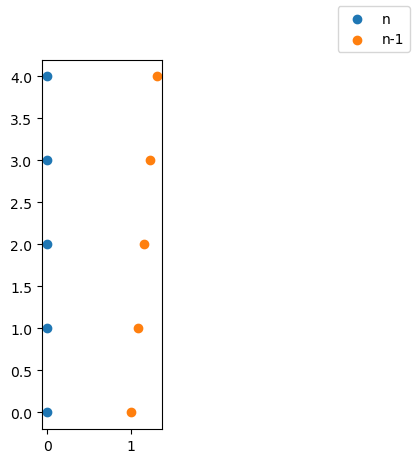

In [11]:
num_particles = 5

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [1.0*1+0.075*i, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
axs_initial.set_aspect('equal')
fig_initial.legend()
#fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)


distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1)
Q_dist_diag = q_matrix.q_dist_diag(distances)
Q_part = q_matrix.q_part(np.shape(distances)[0])
Q_pos = q_matrix.q_pos(np.shape(distances)[0])
Q_array = Q_dist_diag + Q_part + Q_pos
Q_dict = q_matrix.Q_convert_to_dict(Q_array)
#with np.printoptions(precision=3, linewidth=1000, threshold=1e6):
#    print(Q_array)

In [12]:
with open('../API_Token_Oliver_QCSE.txt') as file:
    token = file.readline().rstrip()
    architecture = file.readline().rstrip()
sampler = DWaveSampler(token = token, architecture='pegasus', region='eu-central-1')
tmp_not_needed_as_a_variable = sampler.adjacency # required for sampler having all data needed for __getstate__, no idea why this is necessary


In [13]:
# sampler_graph = sampler.to_networkx_graph()
# layout_source = {i+1 : tuple(part_coords_nm1[i]) for i in range(part_coords_n.shape[0])}
# layout_source
# Q_dict.keys()

# #layout_source = {i : part_coords_n[i] for i in range(part_coords_n.shape[0])}
# a = dnx.pegasus_layout(sampler_graph)
# #dir(dnx.pegasus_graph(16))
# b = dnx.pegasus_layout(dnx.pegasus_graph(16))

# aa = np.sort(list(a.keys()))
# bb = np.sort(list(b.keys()))

# print(aa)
# print(bb)
# print(np.array_equal(aa, bb))
# #print(aa == bb)

# aaa = [a[key] for key in aa]
# bbb = [b[key] for key in bb]
# bba = [b[key] for key in aa]

# print(np.array_equal(aaa, bbb))
# print(np.array_equal(aaa, bba))

# #embedding_candidates = embera.diffusion_placer.find_candidates(Q_dict, sampler_graph, layout=a)
# embedding_candidates = embera.diffusion_placer.find_candidates(Q_dict.keys(), sampler_graph, layout=layout_source)
# #print(embedding_candidates)
# embedding = minorminer.find_embedding(Q_dict, sampler_graph, initial_chains=embedding_candidates)

# dnx.draw_pegasus_embedding(sampler_graph, emb=embedding_candidates)
# dnx.draw_pegasus_embedding(sampler_graph, emb=embedding)


In [14]:
#num_particles = 5

num_vars = 3

p = 7
N = np.power(2,p)
calc_second_order = True
num_samples = N*(2*num_vars+2) if calc_second_order else N*(num_vars+2)
print(f'D = {num_vars}')
print(f'N = 2^p = 2^{p} = {N}')
print(f'calc_second_order = {calc_second_order}, --> number of samples = N({2 if calc_second_order else 1}D+2) = {num_samples}')
# generate N(2D+2) samples, N is specified, calc_second_order=False would make 2D -> 1D, where D is number of variables
# 2 ^ 1 = 2
# 2 ^ 2 = 4
# 2 ^ 3 = 8
# 2 ^ 4 = 16
# 2 ^ 5 = 32
# 2 ^ 6 = 64
# 2 ^ 7 = 128
# 2 ^ 8 = 256
# 2 ^ 9 = 512
# 2 ^ 10 = 1024

problem_salib = {
    'num_vars': num_vars,
    'names': ['annealing_time', 'programming_thermalization', 'readout_thermalization'],
    #'bounds': [[0.5, 2000.0], [0.0, 10000.0], [0.0, 10000.0]]
    'bounds': [[1.0, 250.0], [0.0, 500.0], [0.0, 500.0]]
}
samples_salib = salib.sample.sobol.sample(problem_salib, N=N, calc_second_order=calc_second_order)
assert samples_salib.shape == (num_samples, num_vars), 'size of samples array is not correct'

print(samples_salib.shape, type(samples_salib))
print(samples_salib[0])

problem_dict = problem_salib.copy()
problem_dict.update(N = N, p = p, calc_second_order = calc_second_order, num_samples = num_samples)
parametersets_array = samples_salib

D = 3
N = 2^p = 2^7 = 128
calc_second_order = True, --> number of samples = N(2D+2) = 1024
(1024, 3) <class 'numpy.ndarray'>
[197.04775839 302.43749078 384.71869938]


In [15]:
analysis_folder_path = pathlib.PurePath(pathlib.Path.cwd().parent.joinpath('00_tests').joinpath('01_out').joinpath('test_multithreading'))
print(analysis_folder_path)
print(os.path.isdir(analysis_folder_path))

#folder_path = 'test_params_annealer'
data_file_name = 'parameterstudy_data.h5' #'parameterstudy_data_{}_{}_{}_4.h5'.format(num_particles, emb_suffix[emb_suffix_id], file_suffix[file_suffix_id])
data_file_name_path = analysis_folder_path.joinpath(data_file_name)
info_file_name = 'multithread_parameterstudy_info.h5' #'parameterstudy_info_{}_{}_{}_4.h5'.format(num_particles, emb_suffix[emb_suffix_id], file_suffix[file_suffix_id])
info_file_name_path = analysis_folder_path.joinpath(info_file_name)

embedding_file_path = analysis_folder_path.joinpath('embeddings')
embedding_file_name = 'analyzes_parts_5_01.h5' #analyzes_parts_{}_{}.h5'.format(num_particles, file_suffix[file_suffix_id_path.joinpath(embedding_file_path, embedding_file_name)
embedding_file_name_path = embedding_file_path.joinpath(embedding_file_name)
embedding_file_name_relpath = os.path.relpath(embedding_file_name_path, start=analysis_folder_path)


print(embedding_file_name_path)
embedding_name = 'embedding_em' #'embedding'+emb_suffix[emb_suffix_id]
read_embedding = h5py_funcs.io.read_embedding_from_hdf5_file(file_name_path=analysis_folder_path.joinpath(embedding_file_name_path), data_name=embedding_name)

metadata_dict = {'num_particles': num_particles,
                 'embedding_file' : embedding_file_name_relpath
}

info_set_name = 'param_set_00'

kwargs_info_file = {'metadata_dict': metadata_dict,
                    'problem_dict': problem_dict,
                    'parametersets_array': parametersets_array,
                    'info_set_name': info_set_name,
                    'folder_path_name': analysis_folder_path,
                    'info_file_name': info_file_name}
h5py_funcs.parameterstudy_using_info_file.prepare_info_file(**kwargs_info_file)
read_parametersets = {}
with h5py.File(info_file_name_path, 'r') as f:
    read_parametersets['sets'] = f['/param_set_00/study'].fields('sets')[()]
    read_parametersets['identifiers'] = f['/param_set_00/study'].fields('identifiers')[()]
    #read_parametersets['identifiers'] = [ident.decode('utf-8') for ident in read_parametersets['identifiers']]
    read_parametersets['info'] = {key: value for key, value in f['/param_set_00'].attrs.items()}
    read_parametersets['attrs'] = {}
    for _id in read_parametersets['identifiers']:
        read_parametersets['attrs'][_id] = {key: value for key, value in f['param_set_00']['time_history'][_id].attrs.items()}
print(read_parametersets['attrs'])



c:\Users\oahre\RWTH\OneDrive - Students RWTH Aachen University\RWTH\Simulation_Sciences\Masterthesis\04_Code\Quantum_Annealing_for_Particle_Matching\00_tests\01_out\test_multithreading
True
c:\Users\oahre\RWTH\OneDrive - Students RWTH Aachen University\RWTH\Simulation_Sciences\Masterthesis\04_Code\Quantum_Annealing_for_Particle_Matching\00_tests\01_out\test_multithreading\embeddings\analyzes_parts_5_01.h5
Created new info-file multithread_parameterstudy_info.h5 in folder c:\Users\oahre\RWTH\OneDrive - Students RWTH Aachen University\RWTH\Simulation_Sciences\Masterthesis\04_Code\Quantum_Annealing_for_Particle_Matching\00_tests\01_out\test_multithreading.
{b'zz_8382606463': {'ready': True, 'finished': False}, b'zz_2203735776': {'ready': True, 'finished': False}, b'zz_4771589727': {'ready': True, 'finished': False}, b'zz_7419006802': {'ready': True, 'finished': False}, b'zz_3582620427': {'ready': True, 'finished': False}, b'zz_2821025404': {'ready': True, 'finished': False}, b'zz_10936265

In [16]:
infos_read = h5py_funcs.io.read_info_from_hdf5_file(file_name_path=str(info_file_name_path))
#print(infos_read)
#print(infos_read['param_set_00']['study']['data']['sets'].dtype.names)
#print(infos_read['param_set_00']['time_history'])

In [17]:
embedding_file_name_relpath_read = infos_read['param_set_00']['attrs']['embedding_file']
embedding_file_name_path_read = analysis_folder_path.joinpath(embedding_file_name_relpath_read)
read_embedding = h5py_funcs.io.read_embedding_from_hdf5_file(file_name_path=embedding_file_name_path_read, data_name=embedding_name)
        
composite = FixedEmbeddingComposite(sampler, read_embedding)
     
num_qubits = len(set(inner for outer in read_embedding.values() for inner in outer))

#num_qubits = 100
access_time = 0.0
for param_set in samples_salib:
    _tmp = composite.child.solver.estimate_qpu_access_time(num_qubits=num_qubits, num_reads=1000, annealing_time=param_set[0], programming_thermalization=param_set[1], readout_thermalization=param_set[2])
    access_time += _tmp
    #print(_tmp)
    assert _tmp < 1000000.0
print(access_time)
print(access_time/1e6)
print('30 mins', 30*60)

522516113.87707895
522.516113877079
30 mins 1800


In [18]:
# problems = list(read_parametersets['attrs'].keys())
# #print(problems)
# #print(np.argwhere(infos_read['param_set_00']['study']['identifiers']==problems[5])[0])

# analysis_folder_path_2 = analysis_folder_path
# embedding_file_name_relpath_read = infos_read['param_set_00']['attrs']['embedding_file']
# embedding_file_name_path_read = analysis_folder_path_2.joinpath(embedding_file_name_relpath_read)


# import threading

# def overloaded_submitter_work(self, problem, verbose=0):
#     print(f'    Hello! problem {problem} is being worked on by overloaded_submitter_work {threading.current_thread().name}')
#     return f'solution to problem {problem}'

# def overloaded_writer_work(self, answer, verbose=0):
#         print(f'    Hello! answer {answer} is being worked on by {threading.current_thread().name}')
#         return

# def overloaded_submitter_work(self, problem, verbose=0):
#     print(f'    Hello! problem {problem} is being worked on by overloaded_submitter_work {threading.current_thread().name}')
#     sampler = DWaveSampler(**self.solver)
#     tmp_not_needed_as_a_variable = sampler.adjacency # required for sampler having all data needed for __getstate__, no idea why this is necessary
#     embedding = h5py_funcs.io.read_embedding_from_hdf5_file(file_name_path=embedding_file_name_path_read, data_name=embedding_name)
#     num_qubits = len(set(inner for outer in embedding.values() for inner in outer))
#     #print(num_qubits)
#     _id = np.argwhere(infos_read['param_set_00']['study']['identifiers']==problem)[0]
#     #print(_id)
#     kwargs_estimate_qpu_access_time = {'num_qubits': num_qubits, 'num_reads': 2}
#     for var in ['num_reads', 'annealing_time', 'programming_thermalization', 'readout_thermalization']:
#         if var in infos_read['param_set_00']['study']['sets'].dtype.names:
#             kwargs_estimate_qpu_access_time[var] = read_parametersets['sets'][var][_id]
    
#     composite = FixedEmbeddingComposite(sampler, embedding)
#     time_est = composite.child.solver.estimate_qpu_access_time(**kwargs_estimate_qpu_access_time)
#     print(time_est)
#     return f'estimated qpu access time for problem {problem}: {time_est}'



# st = leap_funcs.qubo.parameterstudy.Multithread_Variationstudy()
# #st.submitter_work = overloaded_submitter_work.__get__(st)
# st.submitter_work = overloaded_submitter_work
# st.writer_work = overloaded_writer_work
# st.problems = problems
# st.solver.update(token = token, region='eu-central-1', name='Advantage_system5.4')
# st.start_execution(verbose=0)

In [19]:
import threading

info_set = 'param_set_00'
embedding_name = 'embedding_em'


analysis_folder_path = pathlib.PurePath(pathlib.Path.cwd().parent.joinpath('00_tests').joinpath('01_out').joinpath('test_multithreading'))
data_file_name = 'multithread_parameterstudy_data.h5' #'parameterstudy_data_{}_{}_{}_4.h5'.format(num_particles, emb_suffix[emb_suffix_id], file_suffix[file_suffix_id])
data_file_name_path = analysis_folder_path.joinpath(data_file_name)
info_file_name = 'multithread_parameterstudy_info.h5' #'parameterstudy_info_{}_{}_{}_4.h5'.format(num_particles, emb_suffix[emb_suffix_id], file_suffix[file_suffix_id])
info_file_name_path = analysis_folder_path.joinpath(info_file_name)

embedding_file_path = analysis_folder_path.joinpath('embeddings')
embedding_file_name = 'analyzes_parts_5_01.h5' #analyzes_parts_{}_{}.h5'.format(num_particles, file_suffix[file_suffix_id_path.joinpath(embedding_file_path, embedding_file_name)
embedding_file_name_path = embedding_file_path.joinpath(embedding_file_name)
embedding_file_name_relpath = os.path.relpath(embedding_file_name_path, start=analysis_folder_path)





failed_runs = {}
def overloaded_submitter_work(self, problem, verbose=0):
    try:
        print('start problem {} by {}'.format(problem, threading.current_thread().name))
        
        _id = np.argwhere(infos_read[info_set]['study']['data']['identifiers']==problem)[0]
        problem_str = problem.decode('utf-8')
        if infos_read[info_set]['time_history'][problem_str]['attrs']['ready']==True and infos_read[info_set]['time_history'][problem_str]['attrs']['finished']==False:
            pass
        elif infos_read[info_set]['time_history'][problem_str]['attrs']['ready']==True and infos_read[info_set]['time_history'][problem_str]['attrs']['finished']==True:
            print('  problem {} already finished. Will be skipped'.format(problem))
            return
        elif infos_read[info_set]['time_history'][problem_str]['attrs']['ready']==False:
            raise ValueError('  problem {} not ready (attr. infofile). Will be skipped'.format(problem))
        sampler = DWaveSampler(**self.solver)
        tmp_not_needed_as_a_variable = sampler.adjacency # required for sampler having all data needed for __getstate__, no idea why this is necessary
        
        embedding_file_name_relpath_read = infos_read[info_set]['attrs']['embedding_file']
        embedding_file_name_path_read = analysis_folder_path.joinpath(embedding_file_name_relpath_read)
        read_embedding = h5py_funcs.io.read_embedding_from_hdf5_file(file_name_path=embedding_file_name_path_read, data_name=embedding_name)
        
        composite = FixedEmbeddingComposite(sampler, read_embedding)
        
        num_qubits = len(set(inner for outer in read_embedding.values() for inner in outer))
        #print(num_qubits)
        
        #print(_id)
        kwargs_estimate_qpu_access_time = {'num_qubits': num_qubits, 'num_reads': 2}
        for var in ['num_reads', 'annealing_time', 'programming_thermalization', 'readout_thermalization']:
            if var in infos_read['param_set_00']['study']['data']['sets'].dtype.names:
                kwargs_estimate_qpu_access_time[var] = infos_read[info_set]['study']['data']['sets'][var][_id]

        qpu_time_est = composite.child.solver.estimate_qpu_access_time(**kwargs_estimate_qpu_access_time)
        if qpu_time_est < composite.child.solver.properties['problem_run_duration_range'][1]:
            print('     timing works out')
        

        dict_data = {'composite': composite.__getstate__().copy(), 'set_identifier': problem}
        kwargs_write_composite = {'file_name_path': str(data_file_name_path),
                                   'dict_data': dict_data.copy(),
                                   'data_name': 'composite',
                                    'name_suffix': problem.decode('utf-8'), 
                                    'overwrite_data_in_file': False,
                                    'track_order': True}

        #h5py_funcs.io.write_to_hdf5_file(**kwargs_write_composite)

        self._queue_answers_to_write.put(kwargs_write_composite)



        h5py_funcs.parameterstudy_using_info_file.update_timestamp_in_info_file(file_name_path=info_file_name_path, info_set=info_set, set_identifier=problem, name='start', timestamp=h5py_funcs.parameterstudy_using_info_file._current_datetime_as_string())
        #kwargs = {key: read_parametersets['sets'][key][i][0] for key in read_parametersets['sets'].dtype.names} # ['sets'][key][i][0] : [0] is required because have shape (1,) 
        kwargs_annealer = {'label' : data_file_name+problem.decode('utf-8'),
                            #'annealing_time': parametersets_array[i][0], 
                            'num_reads': 1000, 
                            'answer_mode': 'raw', 
                            #'programming_thermalization': parametersets_array[i][1], 
                            #'readout_thermalization': parametersets_array[i][2],
                            }
        for var in infos_read['param_set_00']['study']['data']['sets'].dtype.names:
            kwargs_annealer[var] = infos_read[info_set]['study']['data']['sets'][var][_id][0][0]
        #print(kwargs_annealer)
        #print(kwargs)
        #sampleset={'sample_1': 'sample_1', 'sample_2': 'sample_2', 'info': {}}
        sampleset = composite.sample_qubo(Q_dict, **kwargs_annealer)
        print('  successfully finished sampling')
        print('  start writing data to file')
        dict_data = {'sampleset': sampleset.to_serializable(pack_samples=False).copy(), 'set_identifier': problem}
        #dict_data = {'sampleset': sampleset, 'set_identifier': set_identifier}
        kwargs_write_sampleset = {'file_name_path': str(data_file_name_path),
                                   'dict_data': dict_data.copy(),
                                   'data_name': 'sampleset',
                                    #'name_suffix': problem.decode('utf-8'), 
                                    'overwrite_data_in_file': False,
                                    'track_order': True}
        #h5py_funcs.io.write_to_hdf5_file(**kwargs_write_sampleset)
        h5py_funcs.parameterstudy_using_info_file.update_timestamp_in_info_file(file_name_path=info_file_name_path, info_set=info_set, set_identifier=problem, name='finish', timestamp=h5py_funcs.parameterstudy_using_info_file._current_datetime_as_string())
        print('  successfully finished writing data to file')
        #del tmp_not_needed_as_a_variable
        del composite
        del sampler
        del sampleset
        #del kwargs_write_sampleset
        del dict_data
        del kwargs_annealer
        #del kwargs_write_composite
        return kwargs_write_sampleset
    except Exception as e: 
        #e='hi'
        print('  failed run of problem {}, check message for info, samples might still be vaild'.format(problem))
        failed_runs[f'{i}'] = {'set_identifier': problem, 'Message': e}

def overloaded_writer_work(self, answer, verbose=0):
        #print(f'    Hello! answer {answer} is being worked on by {threading.current_thread().name}')
        print(f'    Hello! answer is being worked on by {threading.current_thread().name}')
        h5py_funcs.io.write_to_hdf5_file(**answer)
        del answer
        return
print('number of failed runs: {}'.format(len(failed_runs)), ' Failed runs:', failed_runs)

number of failed runs: 0  Failed runs: {}


In [20]:
stdout_old = sys.stdout
sys.stdout = open(analysis_folder_path.joinpath('log.txt'), 'w')
problems = list(read_parametersets['attrs'].keys())
st = leap_funcs.qubo.parameterstudy.Multithread_Variationstudy()
#st.submitter_work = overloaded_submitter_work.__get__(st)
st.submitter_work = overloaded_submitter_work
st.writer_work = overloaded_writer_work
st.problems = problems
st.solver.update(token = token, region='eu-central-1', name='Advantage_system5.4')
st.start_execution(verbose=0)
print('number of failed runs: {}'.format(len(failed_runs)), ' Failed runs:', failed_runs)

In [ ]:
gc.collect()
gc.garbage

[]